# BASE MODEL: Autoregressive , Moving Average , And ARIMA

In [4]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [7]:
cd /

/


In [8]:
cd Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [9]:
DataKarpos = pd.read_csv('Target.csv') # Only Karpos Location is used here . Other locations are zero

In [10]:
DataKarpos[1:2]

,Unnamed: 0,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,...,daysInterval,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
1,10,2007-01-02 00:00:00,0.950396,Karpos,1,0.33293,1,NaN,0,-0.094688,...,0 days 00:00:00.000000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
TargetKarpos = DataKarpos[['PM10']].copy(deep=True) # copy PM10 data out from data sets

# Analysis Of Misiing Values

In [12]:
Target = DataKarpos[['PM10']].copy(deep=True)

In [13]:
Target.shape

(89500, 1)

In [14]:
null_data_PM10 = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [15]:
null_data_PM10.to_csv("PM10_NUll.txt")# save to file

In [16]:
Target.to_csv("R_target.csv")# save to file

In [17]:
null_data_PM10.head()

,PM10
168,NaN
169,NaN
170,NaN
171,NaN
172,NaN


In [18]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [19]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [20]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [21]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    32.258101
dtype: float64

# Fill Missing Values With Nan

In [22]:
pwd

'/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017'

In [23]:
Target.fillna(0,inplace=True) # Fill Missing value with 0. Default model

In [24]:
Data = pd.read_csv('ItemListWithDummy.csv')

In [25]:
x_axis = Data['date']

In [26]:
x_axis = pd.to_datetime(x_axis)

#  Test Stationarity


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

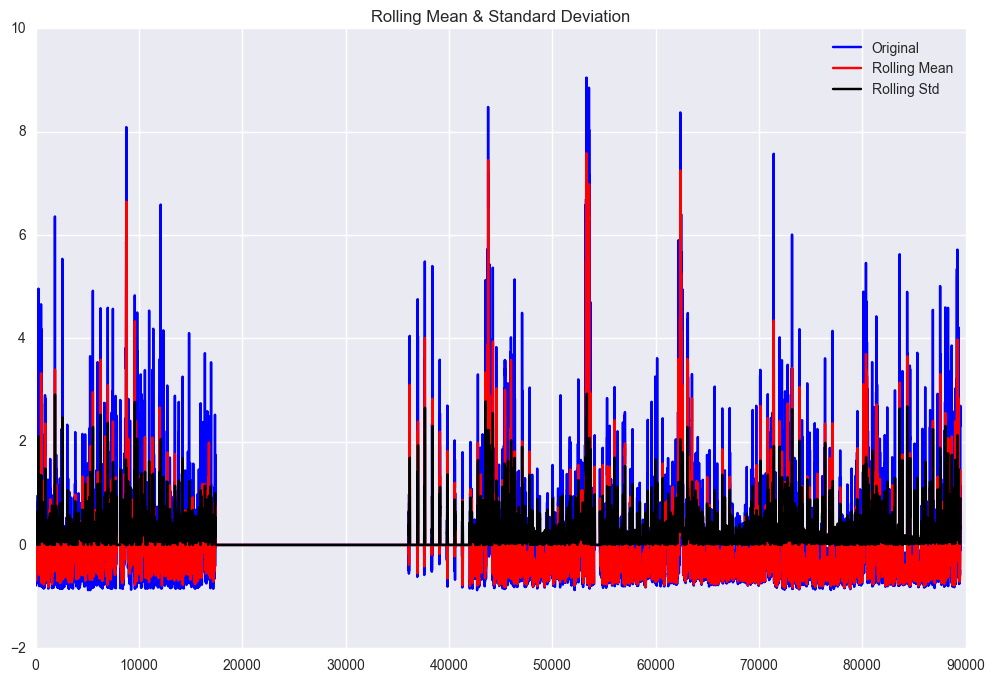

Results of Dickey-Fuller Test:
Test Statistic                   -21.629152
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89433.000000
Critical Value (10%)              -2.566787
Critical Value (5%)               -2.861572
Critical Value (1%)               -3.430423
dtype: float64


In [32]:
test_stationarity(Target.PM10) 

In [39]:
# Test statistic is less than the critical value. So data not stationary

False

# Eliminate trend : Using Weighted moving average

//anaconda/envs/seychelles/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,halflife=12).mean()
  if __name__ == '__main__':


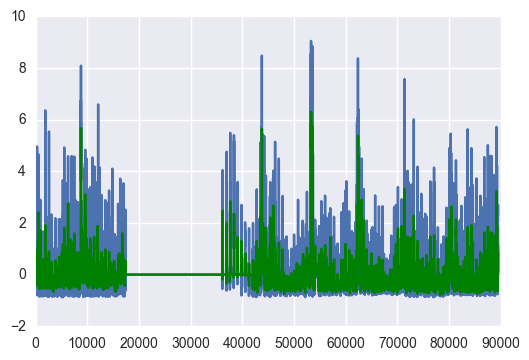

In [29]:
Weighted_moving_avg = pd.ewma(Target.PM10, halflife=12)
plt.plot(Target.PM10)
plt.plot(Weighted_moving_avg, color='green')

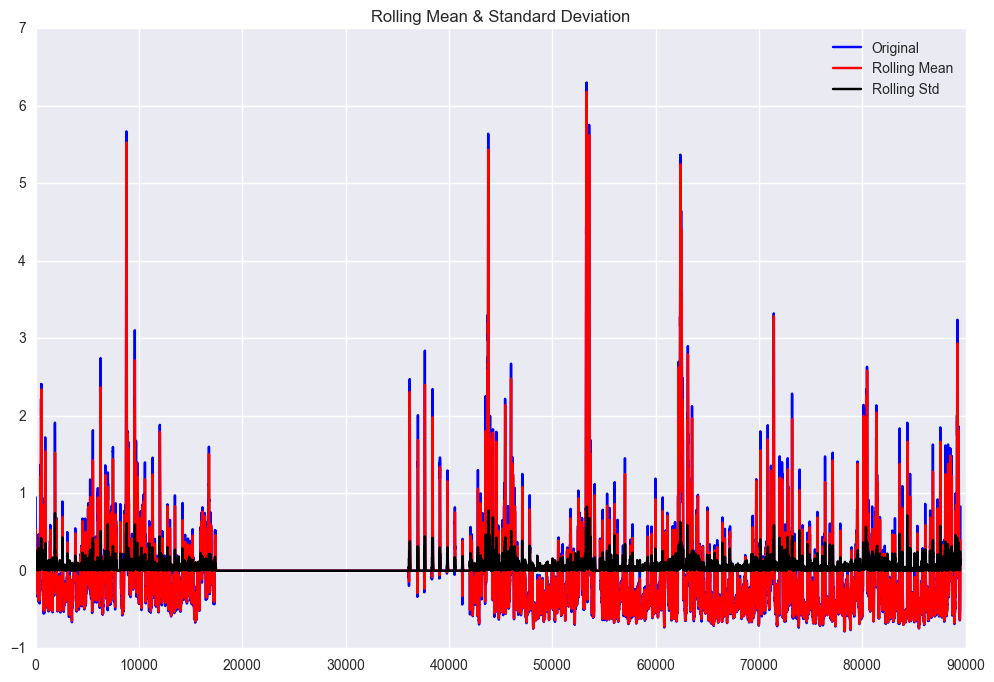

Results of Dickey-Fuller Test:
Test Statistic                -1.801830e+01
p-value                        2.700465e-30
#Lags Used                     6.600000e+01
Number of Observations Used    8.943300e+04
Critical Value (10%)          -2.566787e+00
Critical Value (5%)           -2.861572e+00
Critical Value (1%)           -3.430423e+00
dtype: float64


In [51]:
test_stationarity(Weighted_moving_avg) 

In [56]:
# the data set is not yet stationary since the test statistic is not greater than critical value

<p> Let use diffrencing to show trend </p>

In [70]:
Target_tr = Target.copy(deep=True)

In [71]:
Target_tr['date']= x_axis

In [72]:
Target_tr[1:2]

,PM10,date
1,0.950396,2007-01-02


In [73]:
Target_tr.dtypes

PM10           float64
date    datetime64[ns]
dtype: object

In [74]:
Target_tr.set_index('date',inplace=True);

In [75]:
Target_tr[1:2]

,PM10
date,
2007-01-02,0.950396


In [99]:
del Target_tr.index.name

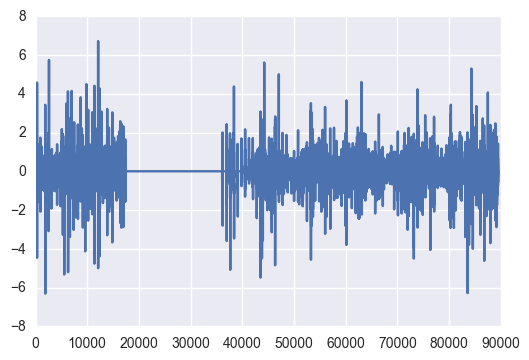

In [102]:
Target_diff = Target - Target.shift()
Target_diff.fillna(0,inplace=True)
plt.plot(Target_diff)

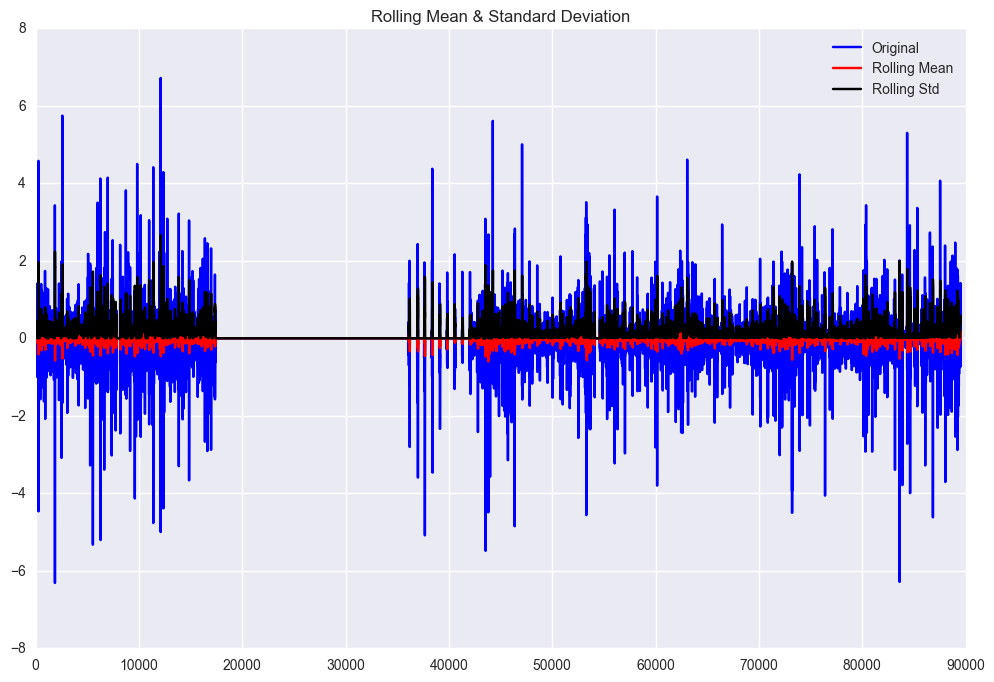

Results of Dickey-Fuller Test:
Test Statistic                   -51.780300
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89433.000000
Critical Value (5%)               -2.861572
Critical Value (1%)               -3.430423
Critical Value (10%)              -2.566787
dtype: float64


In [31]:
test_stationarity(Target_diff.PM10)# the difference was very important in detrending as test statistics is now greater than
                                    #critical value

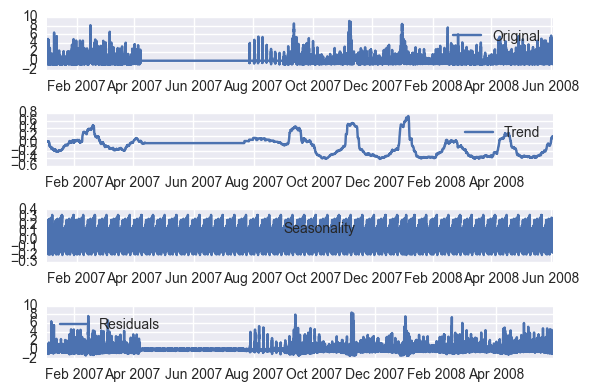

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Target_tr.PM10,freq=2000)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Target_tr.PM10, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

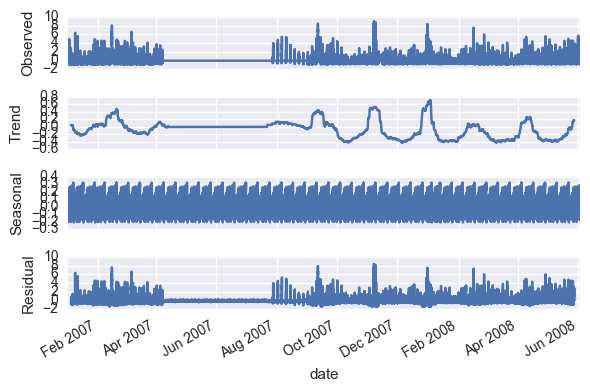

In [60]:
import statsmodels.api as sm  
import warnings
warnings.simplefilter(action = "ignore")
Target_tr.PM10.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(Target_tr.PM10,freq=2000)  
fig = plt.figure()  
fig = result.plot()

In [76]:
Target_tr_diff = Target_tr - Target_tr.shift()

In [77]:
Target_tr_diff.fillna(0,inplace=True)

# Autocorrelation plot to determine parameters for ARIMA model

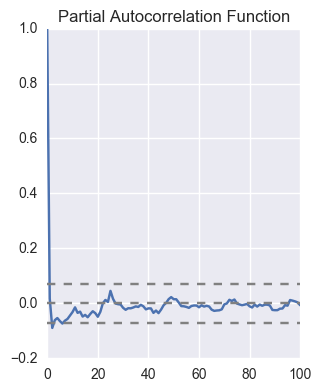

In [82]:
from statsmodels.tsa.stattools import acf, pacf
lag_pacf = pacf(Target_tr_diff, nlags=200, method='ols')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-20.96/np.sqrt(len(Target_tr)),linestyle='--',color='gray')
plt.axhline(y=20.96/np.sqrt(len(Target_tr)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

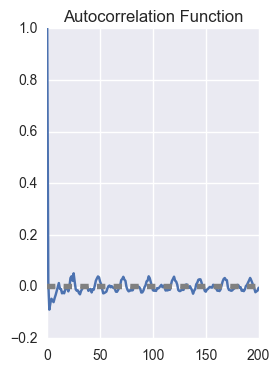

In [89]:
lag_acf = acf(Target_tr_diff, nlags=200)
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

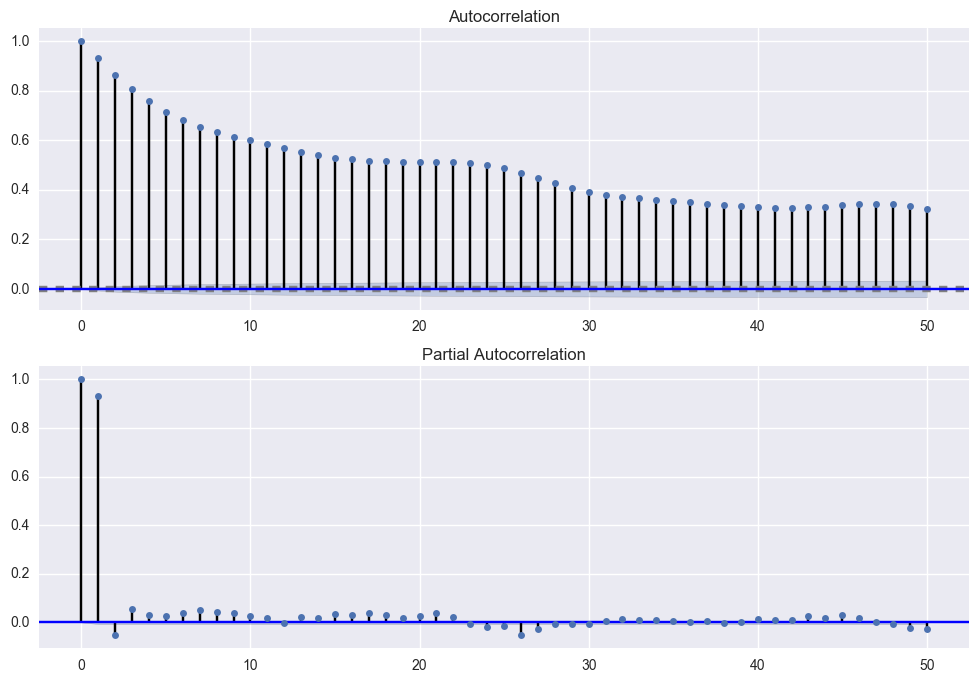

In [94]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
fig = sm.graphics.tsa.plot_acf(Target_tr, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Target_tr, lags=50, ax=ax2)

In [90]:
from statsmodels.tsa.arima_model import ARIMA


In [83]:
# ARIMA Model

In [84]:
from statsmodels.tsa.arima_model import ARIMA


### AR model

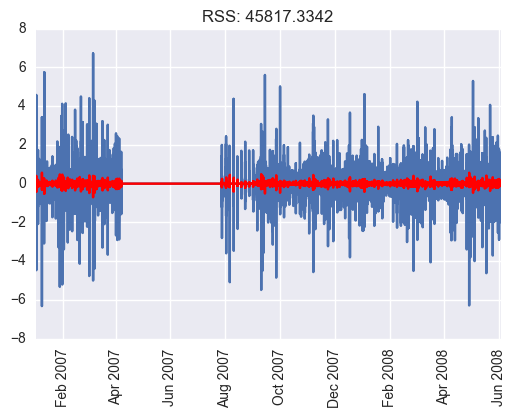

In [126]:
model = ARIMA(Target_tr, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(Target_tr_diff)
plt.plot(results_AR.fittedvalues, color='red')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-Target_tr_diff.PM10)**2))

### Moving Average  model

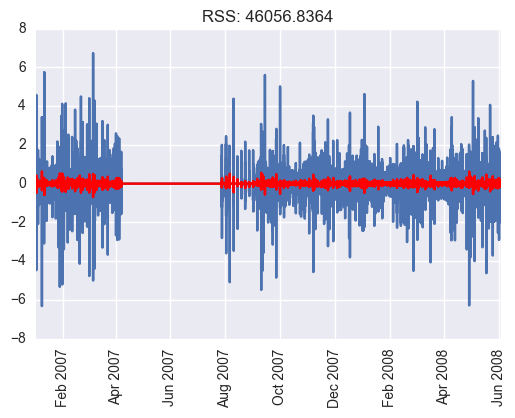

In [129]:
model = ARIMA(Target_tr, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(Target_tr_diff)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-Target_tr_diff.PM10)**2))

In [ ]:
### ARIMA model

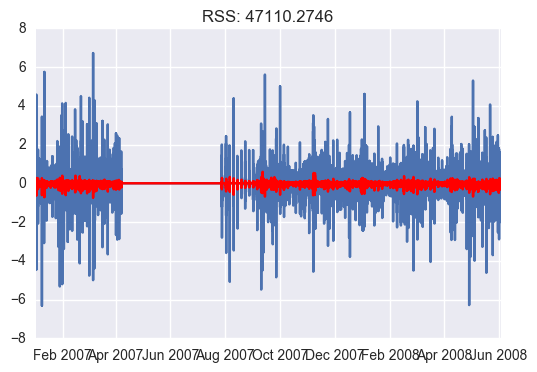

In [239]:
model = ARIMA(Target_tr, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(Target_tr_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-Target_tr_diff.PM10)**2))

In [ ]:
# Get back to base model

In [241]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

2007-01-02    0.000006
2007-01-02    0.000006
2007-01-02   -0.009114
2007-01-02    0.041560
2007-01-02    0.026018
dtype: float64


In [227]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2007-01-02    0.000006
2007-01-02    0.000012
2007-01-02   -0.009051
2007-01-02    0.033156
2007-01-02    0.059828
dtype: float64


In [228]:
predictions_ARIMA_log = pd.Series(Target_tr.ix[0], index=Target_tr.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2007-01-02    0.000006
2007-01-02    0.000012
2007-01-02   -0.009051
2007-01-02    0.033156
2007-01-02    0.059828
dtype: float64

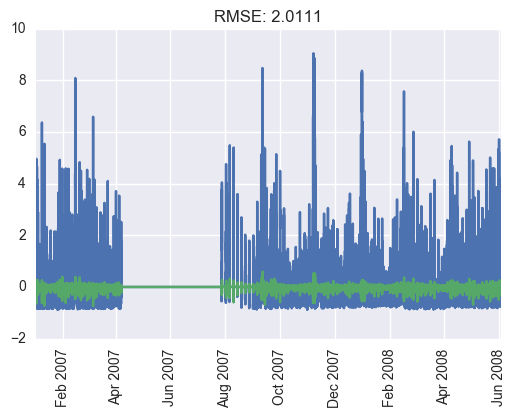

In [242]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Target_tr)
plt.plot(predictions_ARIMA_diff)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-Target_tr.PM10)**2)/len(Target_tr)))

# RMSE FOR OUR PREDICTION

In [243]:
# compute rmse for last 48 hours
pred =predictions_ARIMA_diff[-48:].copy(deep=True)
real = Target_tr[-48:].copy(deep=True)

In [244]:
from sklearn.metrics import mean_squared_error

In [245]:
mean_squared_error(real.PM10, pred)**0.5  

1.0136181406461313

In [246]:
rmse =np.sqrt(np.sum((pred.values-real.PM10)**2)/len(pred))

In [247]:
rmse

1.0136181406461313

# RMSE for AR MODEL

In [163]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)


In [197]:
predictions_ar = predictions_AR_diff[-48:].copy(deep=True)

In [198]:
rmse =np.sqrt(np.sum((predictions_ar.values-real.PM10)**2)/len(pred))

In [200]:
print("RMSE for autoregressive model: ");rmse

RMSE for autoregressive model: 


0.94765861915501515

In [202]:
mean_squared_error(real.PM10, predictions_ar)**0.5   # using scikit rmse function

0.94765861915501526

# RMSE For MA

In [205]:
predictions_MA = pd.Series(results_MA.fittedvalues, copy=True)


In [206]:
predictions_MA_sum = predictions_MA.cumsum()


In [207]:
predictions_MA_log = pd.Series(Target_tr.ix[0], index=Target_tr.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_sum,fill_value=0)
predictions_MA_log.head()

2007-01-02    0.000015
2007-01-02    0.000031
2007-01-02   -0.001681
2007-01-02    0.046340
2007-01-02    0.045271
dtype: float64

In [208]:
# RMSE
pred_ = predictions_MA_log[-48:].copy(deep=True)

In [211]:
rmse =np.sqrt(np.sum((pred_.values-real.PM10)**2)/len(pred))

In [212]:
rmse

1.5032478765045199

In [213]:
mean_squared_error(real.PM10, pred_)**0.5   # using scikit rmse function

1.5032478765045196